# Descomponiendo series temporales

Hemos aprendido que una serie temporal se puede descomponer en sus componentes básicas, estas son (según el enfoque descriptivo):
 - Tendencia
 - Estacionalidad
 - Ruido
 
Empezamos analizando unas series temporales

In [1]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

#### Australian AntiDiabetic Drug Sales dataset

In [3]:
df = pd.read_csv('data/Australian_AntiDiabetic_DrugSales.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [4]:
df.index.year.unique()

Index([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008],
      dtype='int32', name='date')

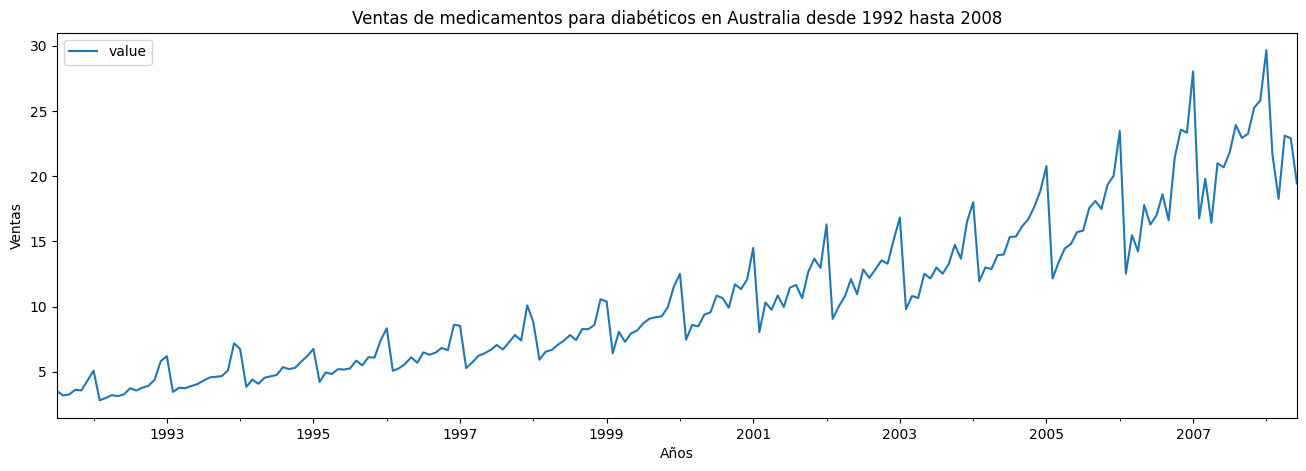

In [5]:
ax = df.plot(figsize=(16,5), title='Ventas de medicamentos para diabéticos en Australia desde 1992 hasta 2008');
ax.set_xlabel("Años");
ax.set_ylabel("Ventas");

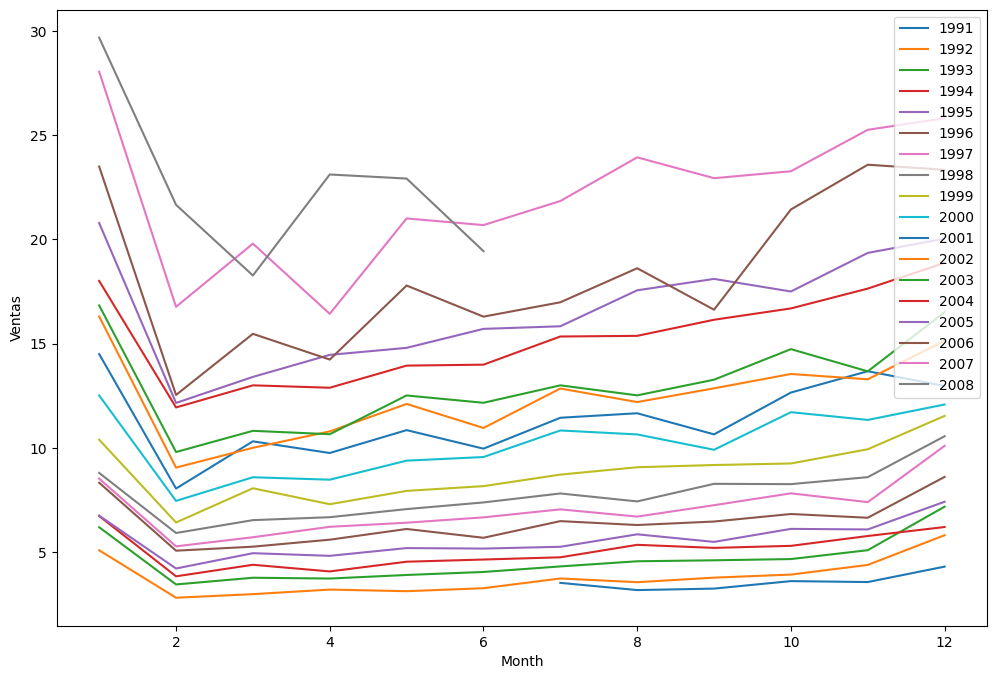

In [6]:
df['year'] = df.index.year
df['month'] = df.index.month
df_pivot = pd.pivot_table(df, values='value', index='month', columns='year', aggfunc='mean')
df_pivot.plot(figsize=(12,8))
plt.legend()
plt.xlabel('Month')
plt.ylabel('Ventas')
plt.show();

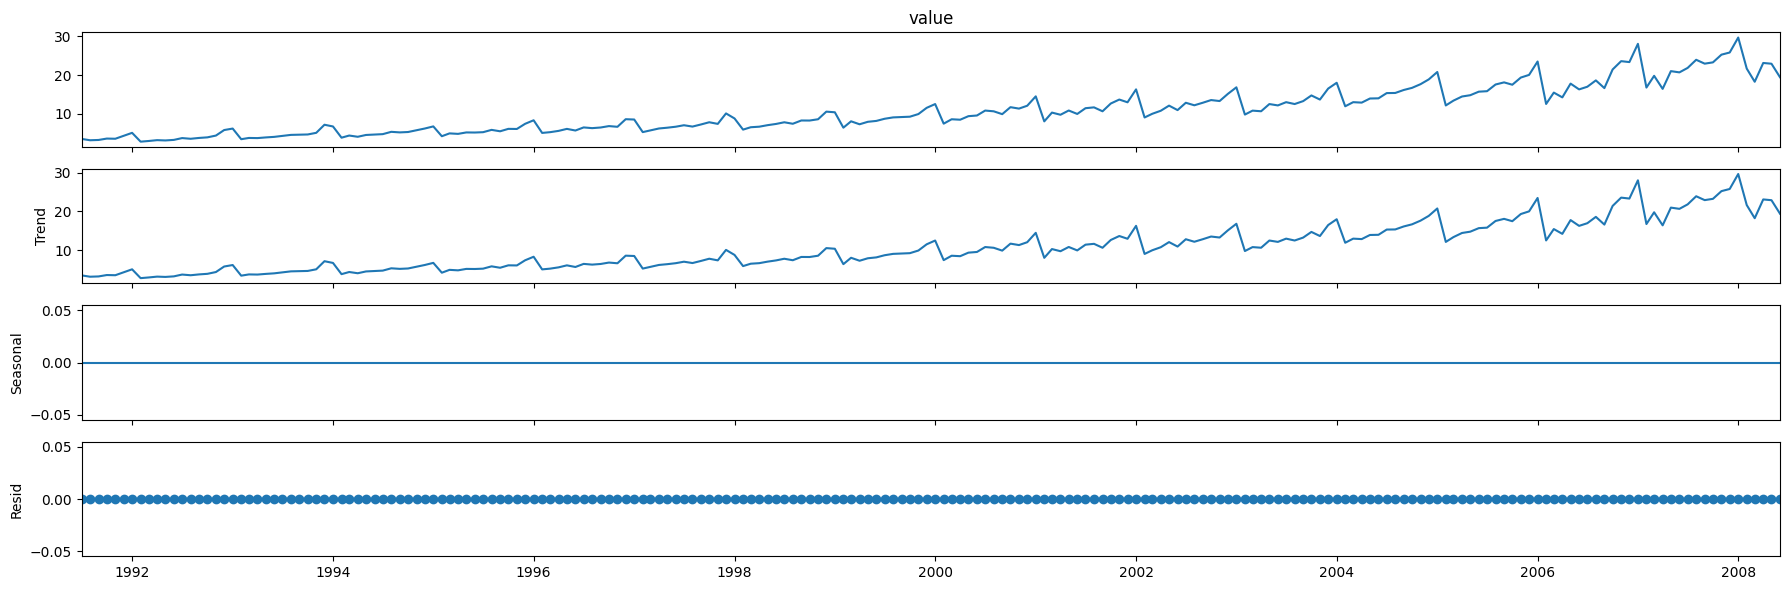

In [7]:
additive = seasonal_decompose(df['value'], model='additive', period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    additive.plot()
    plt.show()

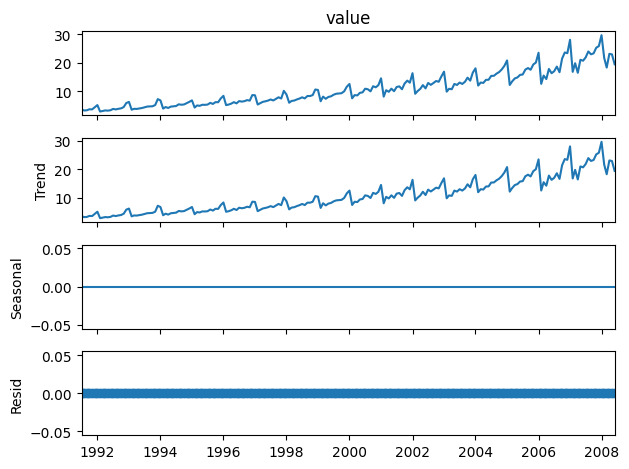

In [8]:
additive.plot();

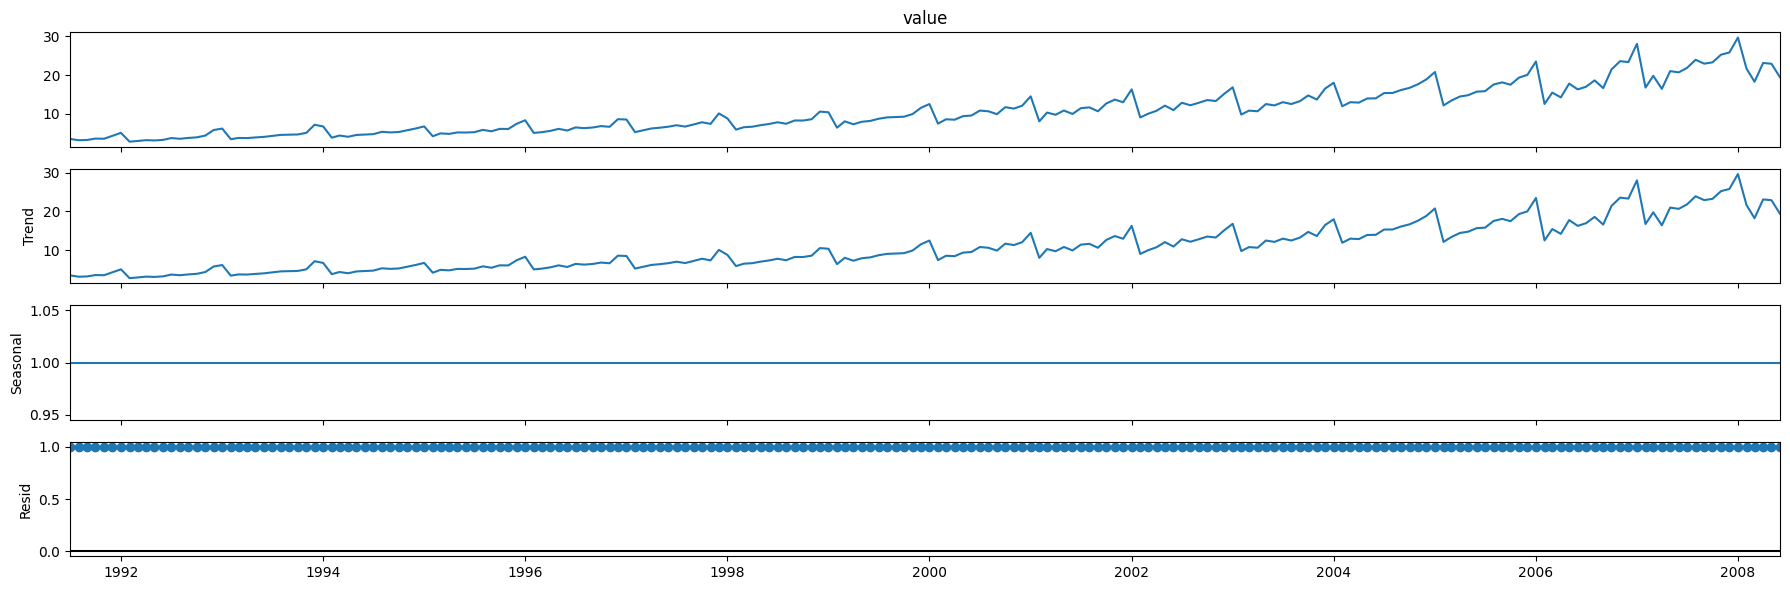

In [9]:
multiplicative = seasonal_decompose(df['value'], model='multiplicative', period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    multiplicative.plot()
    plt.show()

Podemos ver que la multiplicativa podría ser mejor porque no hay patrón en el error, lo que indica que es bueno. Además vemos como esta serie crece la parte estacional en base a la tendencia... por lo que la multiplicativa es interesante.

#### Milk Production dataset

In [10]:
df = pd.read_csv('data/MilkProduction.csv', sep=',', parse_dates=['Date'], index_col='Date')
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


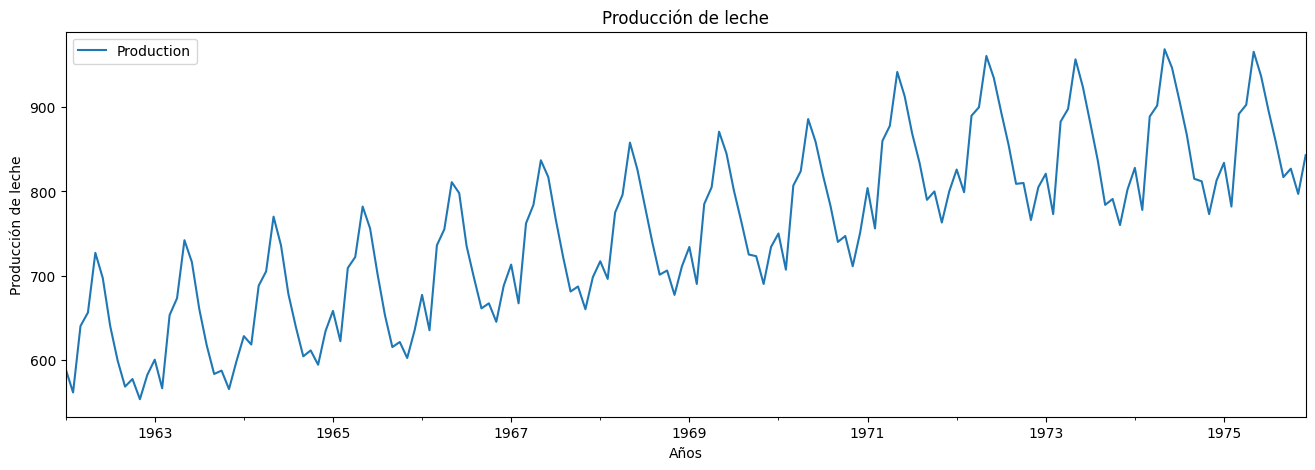

In [11]:
ax = df.plot(figsize=(16,5), title='Producción de leche');
ax.set_xlabel("Años");
ax.set_ylabel("Producción de leche");

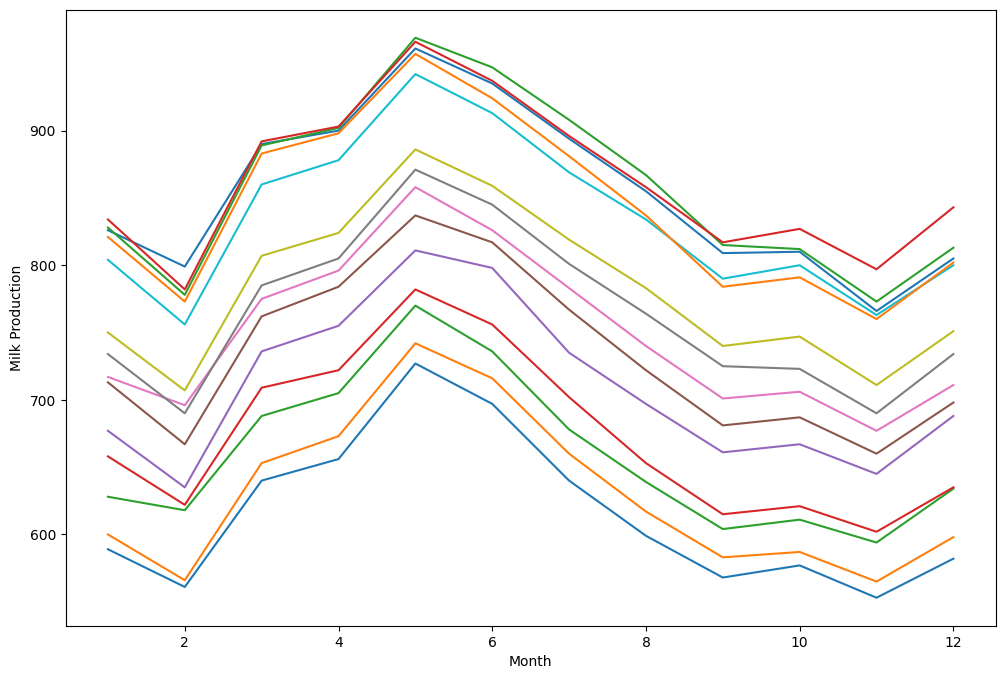

In [12]:
df['year'] = df.index.year
df['month'] = df.index.month
df_pivot = pd.pivot_table(df, values='Production', index='month', columns='year', aggfunc='mean')
df_pivot.plot(figsize=(12,8))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.show()

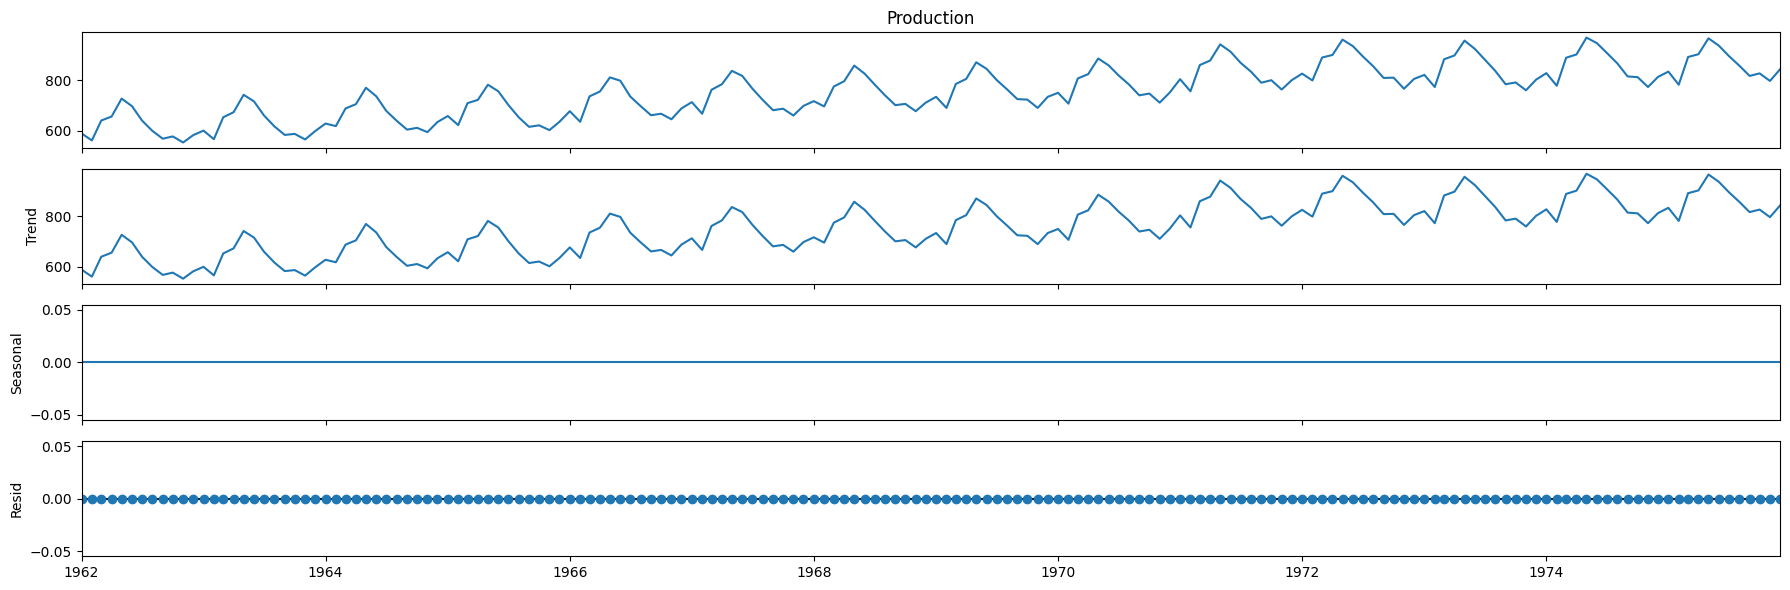

In [13]:
additive = seasonal_decompose(df['Production'], model='additive', period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    additive.plot()
    plt.show()

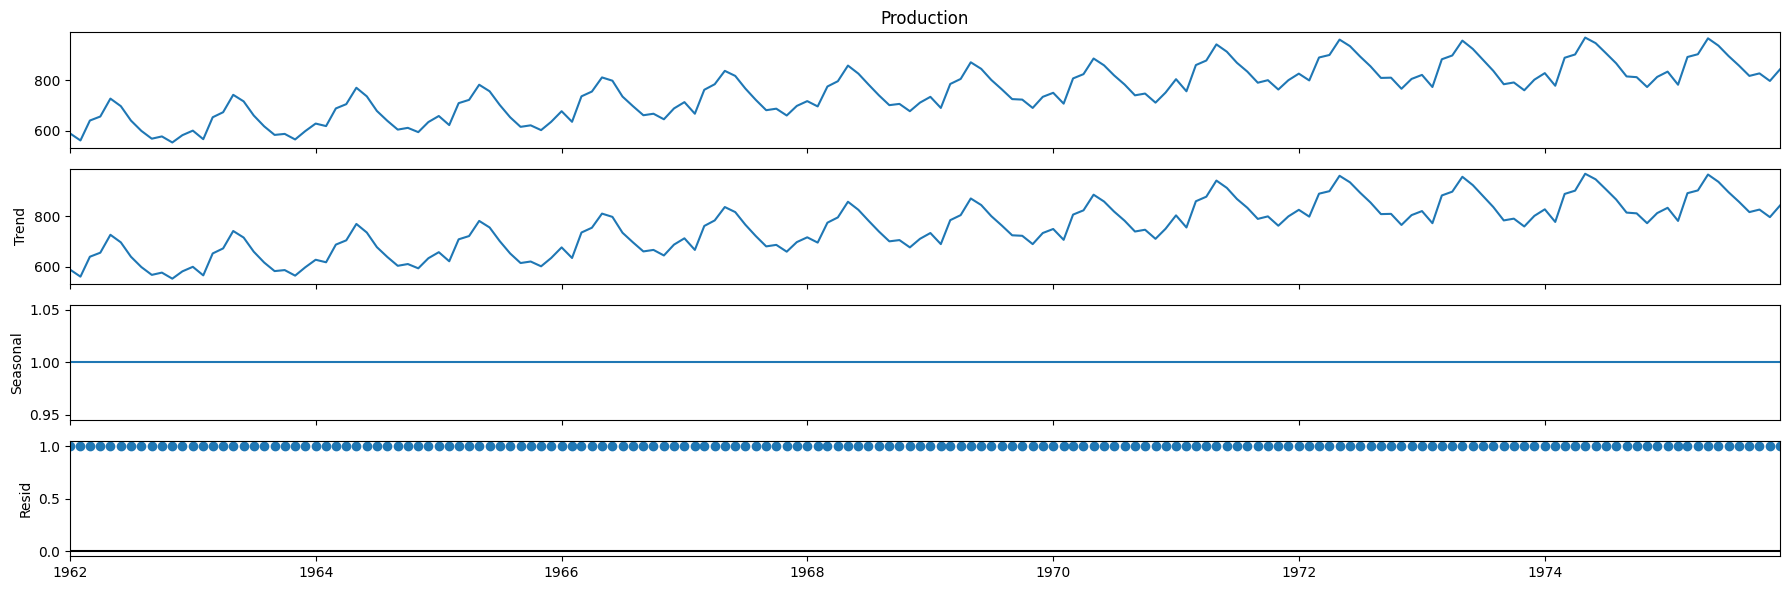

In [14]:
multiplicative = seasonal_decompose(df['Production'], model='multiplicative', period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    multiplicative.plot()
    plt.show()

En este caso vemos que la aditiva no tiene ningún patrón interesante en el error, parece que es un modelo de descomposición interesante para esta serie temporal.

In [15]:
additive.resid.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Air Passengers dataset

In [16]:
df = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
df.index.year.unique()

Index([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960], dtype='int32', name='Month')

Hemos cargado el dataset de los pasajeros de avión desde 1949 hasta 1960.

Vamos a visualizarlo para comprenderlo mejor.

Text(0, 0.5, '# Pasajeros')

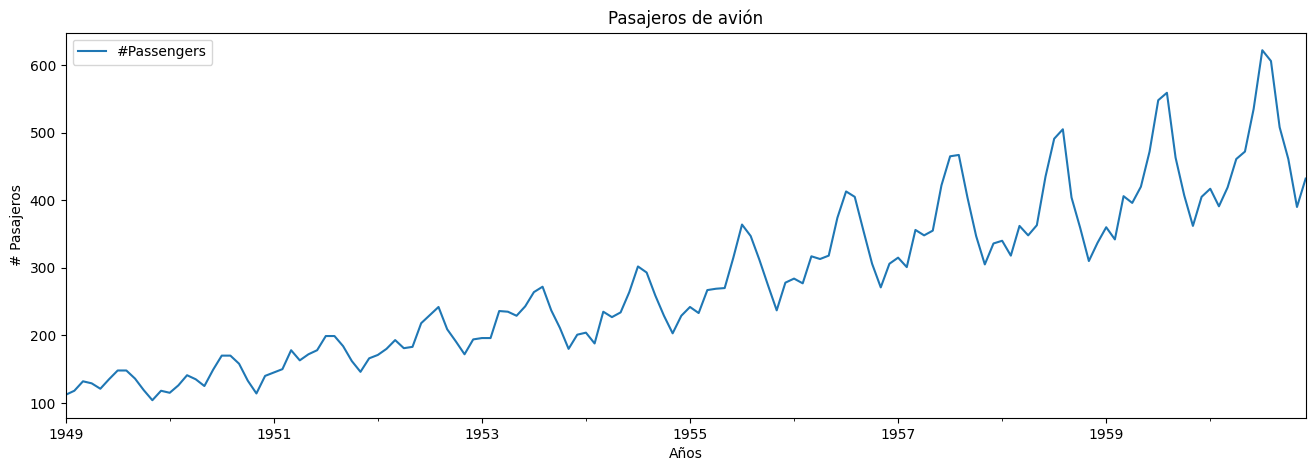

In [18]:
ax = df.plot(figsize=(16,5), title='Pasajeros de avión')
ax.set_xlabel("Años")
ax.set_ylabel("# Pasajeros")

Es una serie temporal que tiene una tendencia clara y parece que tiene algo de estacionalidad.

Echemos un vistazo a la estacionalidad.

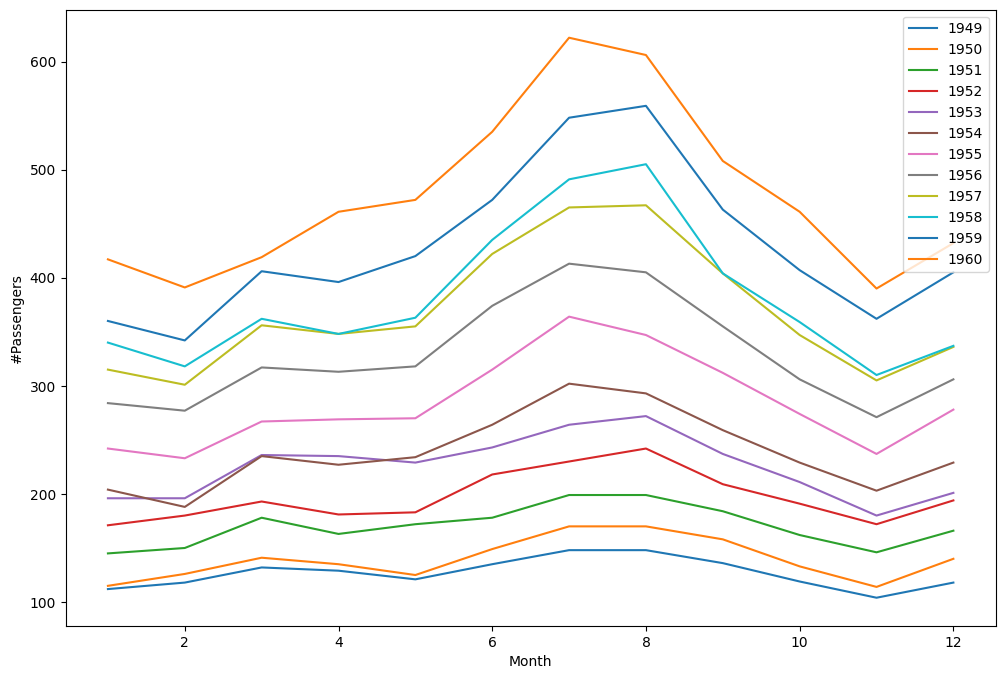

In [19]:
df['year'] = df.index.year
df['month'] = df.index.month
df_pivot = pd.pivot_table(df, values='#Passengers', index='month', columns='year', aggfunc='mean')
df_pivot.plot(figsize=(12,8))
plt.legend()
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.show()

Este tipo de gráfico es muy interesante para ver la estacionalidad. Podemos comporbar cómo en los meses de verano suele haber un componente estacional pues mucha gente viaja en esa época en cada año.

Hemos podido ver que hay una cierta tendencia en la serie temporal, la cual nos indica que según transcurrían los años más pasajeros utilizaban el avión. Esa gráfica nos indicó una posible estacionalidad, pero una segunda gráfica comparando los meses de cada año nos hizo entender que efectivamente hay una estacionalidad clara.

¿Cómo descomponer una serie temporal y ver sus diferentes componentes?

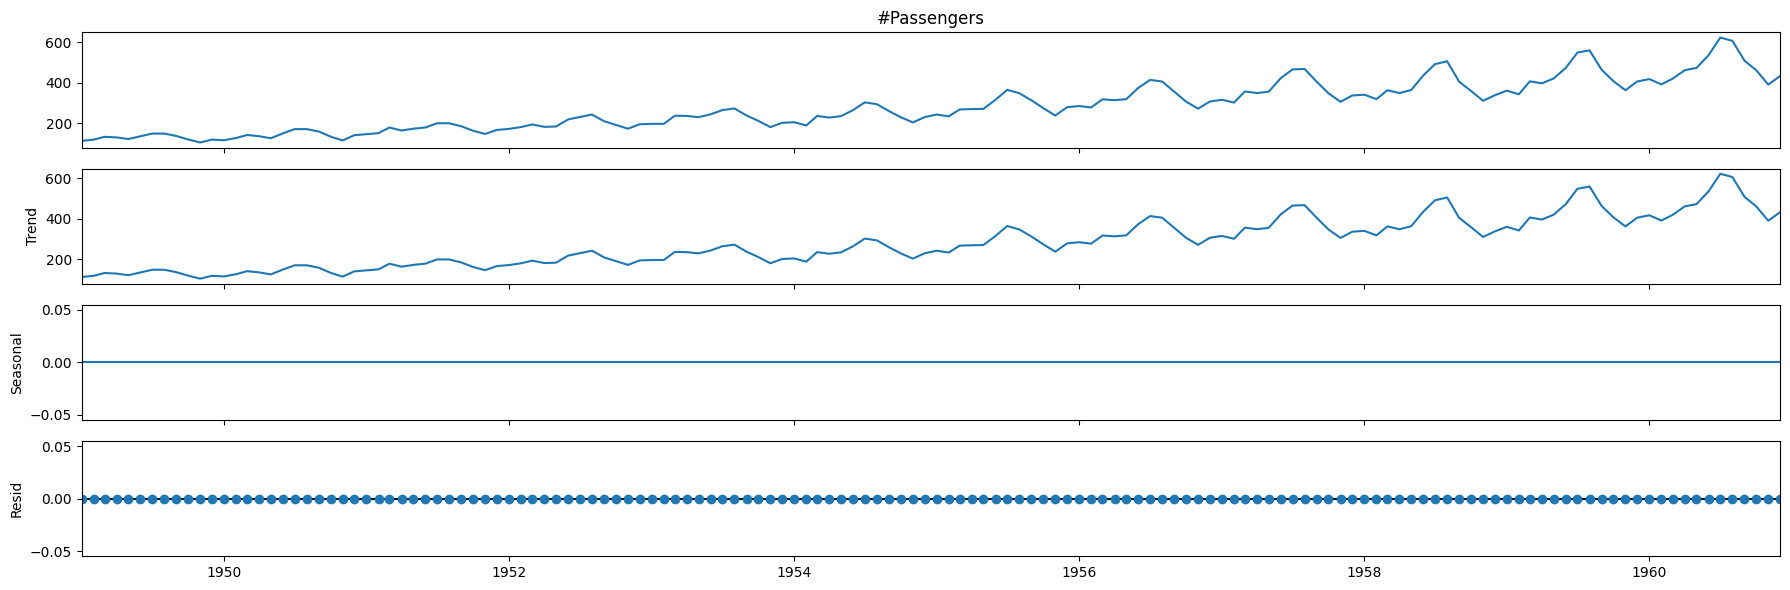

In [20]:
additive = seasonal_decompose(df['#Passengers'], model='additive', period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    additive.plot()
    plt.show()

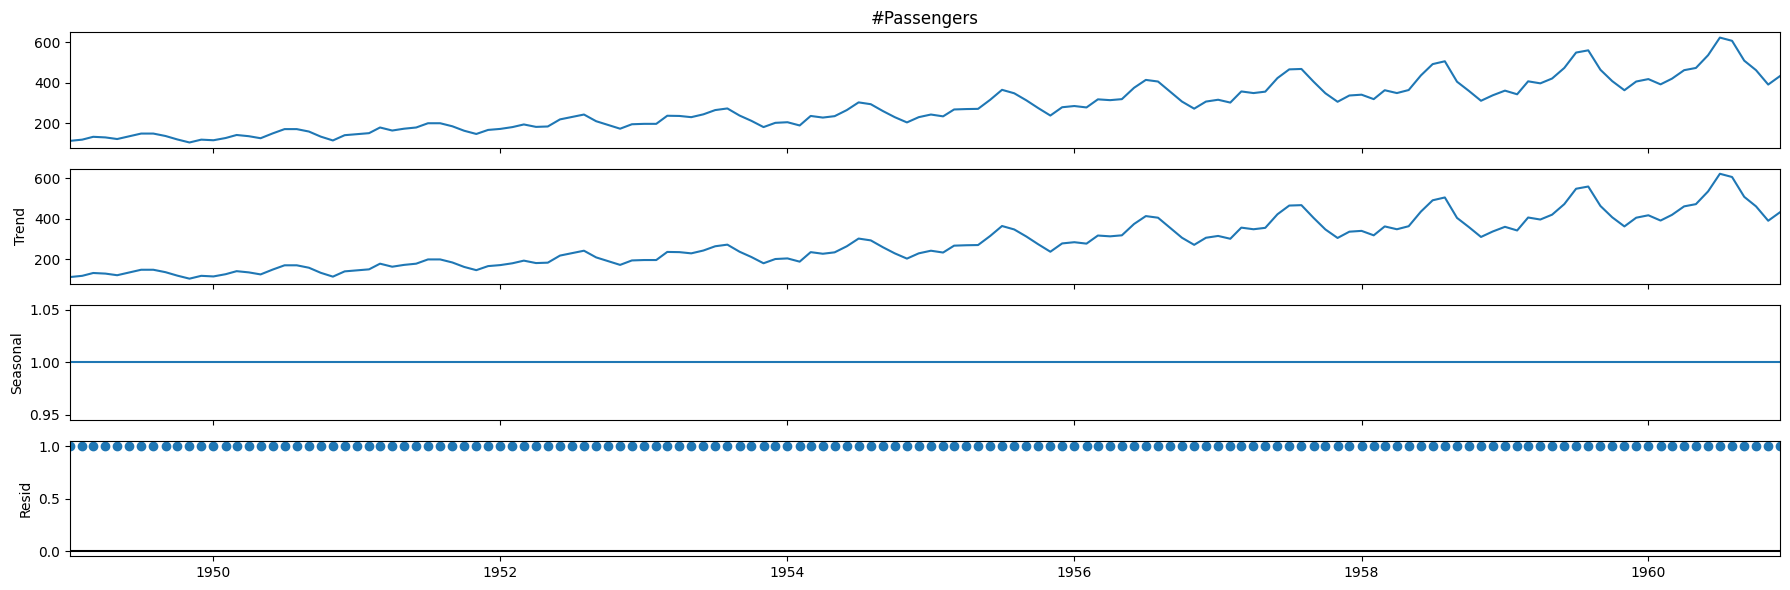

In [21]:
multiplicative = seasonal_decompose(df['#Passengers'], model='multiplicative', period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    multiplicative.plot()
    plt.show()

Tiene pinta que el ruido (Residual) es más aleatorio en la multiplicativa que en la aditiva, lo cual es positivo para nosotros. Tiene sentido, porque la tendencia afecta a la estacionalidad en mi serie temporal luego indica que esta descomposición es mejor.